# Estratégias de Boosting.
Os métodos de boosting é uma categoria de Ensemble Learning, com foco principalmente em diminuir o viés dos modelos. Tem com base treinar vários modelos simples com a finalidade de produzir um modelo final e mais robusto, no entanto nos algoritmos de Boonsting, os modelos  não são mais treinados de forma independente entre si, mas de maneira sequencial, a partir de um ajuste dos modelos treinados previamentes.
$\newline$ Para maximizar o desempenho preditor ele treina interativamente novos  modelos com um foco nas observações que os modelos anteriores erraram mais, tornando a predição mais resistente ao viés, assim atualiza o modelo para priorizar as novas predições.



## Boostings Gradient.
Ao  invés de estabelecer pesos para o weak learners, o Gradient terina novos modelos diretamente no erro dos modelos anteriores, ou seja, os novos modelos tentam prever o erro dos modelos anteriores em vez de prever o erro dos modelos anteriores em vez de prever independente o target.
$\newline$ O primerio modelo faz uma aproximação bem simples para predição, e obtemos os nossos erros residuais (observando menos e previsto), depois, treinamos mais modelos nesses erros residuais para tentar predizer o erro do primeiro modelo. Assim forma, quando somamos as predições de cada modelo para obter a predição final, obtemos uma versão mais corrigida da primeira predição.

![img](https://datarisk.io/wp-content/uploads/2020/06/Captura-de-tela-de-2020-06-06-21-52-32.png)

Repetimos esse processo por várias iterações, obtendo erros residuais cada vez menores.

![img](https://datarisk.io/wp-content/uploads/2020/06/Captura-de-tela-de-2020-06-06-21-53-27.png)

## Boosting ADA.
Adaptive Boosting é um algoritmo que consiste em combinar de forma sequêncial vários modelos mais fracos, sendo assim o weak learner subsequencial leva em consideração as predições do anterior, para formar um preditor mais conciso. O diferencial desse algoritmo é que as predições mais dificeis recebem um peso maior no preditor seguinte, assim buscando maior otimização do algoritmo final.

![img](https://datarisk.io/wp-content/uploads/2020/06/Captura-de-tela-de-2020-06-06-21-51-44.png)

Se reparamos aqui existe dois pesos. O primeiro é para cada observação que representa o grau de foco que a interação em questão deve dar para aquela observação. A cada novo modelo treinado, esse peso das amostras são atualizados, já o segundo é um peso para cada modeloque representa seu poder de decisão quando os modelos combinados. Eles são atribuidos apenas uma vez para cada estimador.

# Pratica.

In [13]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot


In [14]:
X,y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,random_state=7)

In [15]:
model = GradientBoostingRegressor();

In [16]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [17]:
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [18]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.450 (3.241)


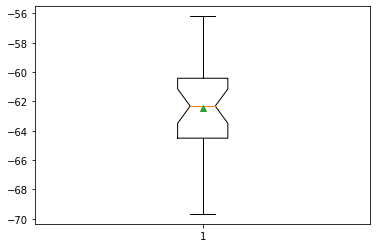

In [27]:
pyplot.boxplot(n_scores,std(n_scores), showmeans=True)
pyplot.show()